In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import random

In [2]:
# Construct a tf.data.Dataset
from tensorflow.keras.datasets import fashion_mnist
# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
def show_img(index):
    plt.figure(figsize=(1.5, 1.5))
    plt.imshow(train_data[index], cmap=plt.cm.binary)
    plt.title(f"Label: {class_names[train_labels[index]]}")
    plt.axis('off')
    plt.show() 

In [5]:
def plot_random():
    plt.figure(figsize=(4, 4))
    for i in range(4):
        ax = plt.subplot(2, 2, i + 1)
        rand_index = random.choice(range(len(train_data)))
        plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
        plt.title(f"Label: {class_names[train_labels[rand_index]]}")
        plt.axis('off')
    plt.show()

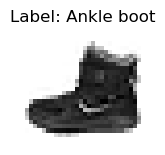

In [6]:
show_img(0)

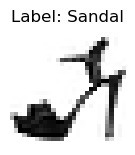

In [7]:
show_img(9)

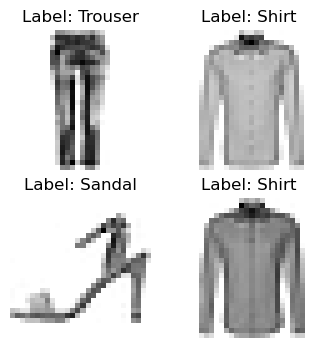

In [8]:
plot_random()

### Build a classification model
- Input shape - (28x28)
- Output shape - 10
- Loss function - Categorical Crossentropy
- Output activation - Softmax


In [31]:
model_one = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512,activation="relu"),
    tf.keras.layers.Dense(256,activation="relu"),
    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dense(64,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax"),
])
model_one.compile(optimizer="adam",loss ="sparse_categorical_crossentropy",metrics=["accuracy"])
non_norm_history = model_one.fit(train_data,
                                train_labels,
                                epochs=18,
                                validation_data=(test_data, test_labels),verbose=1)

Epoch 1/18
1875/1875 [==============================] - 3s 1ms/step - loss: 1.0799 - accuracy: 0.7850 - val_loss: 0.5486 - val_accuracy: 0.7982
Epoch 2/18
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4603 - accuracy: 0.8375 - val_loss: 0.4312 - val_accuracy: 0.8483
Epoch 3/18
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4321 - accuracy: 0.8474 - val_loss: 0.4485 - val_accuracy: 0.8501
Epoch 4/18
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3978 - accuracy: 0.8597 - val_loss: 0.4305 - val_accuracy: 0.8522
Epoch 5/18
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3718 - accuracy: 0.8666 - val_loss: 0.4366 - val_accuracy: 0.8400
Epoch 6/18
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3573 - accuracy: 0.8729 - val_loss: 0.4447 - val_accuracy: 0.8452
Epoch 7/18
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3440 - accuracy: 0.8771 - val_loss: 0.4098 - val_accuracy:

In [32]:
model_one.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 512)               401920    
                                                                 
 dense_19 (Dense)            (None, 256)               131328    
                                                                 
 dense_20 (Dense)            (None, 128)               32896     
                                                                 
 dense_21 (Dense)            (None, 64)                8256      
                                                                 
 dense_22 (Dense)            (None, 10)                650       
                                                                 
Total params: 575,050
Trainable params: 575,050
Non-tr

In [33]:
import pandas as pd
pd.DataFrame(non_norm_history.history)

,loss,accuracy,val_loss,val_accuracy
0,1.079880,0.785033,0.548599,0.7982
1,0.460329,0.837450,0.431231,0.8483
2,0.432055,0.847400,0.448536,0.8501
3,0.397769,0.859650,0.430515,0.8522
4,0.371835,0.866650,0.436649,0.8400
5,0.357308,0.872917,0.444746,0.8452
6,0.343984,0.877133,0.409826,0.8620
7,0.330505,0.881850,0.387749,0.8711
8,0.322466,0.885200,0.384982,0.8650
9,0.316192,0.887317,0.381884,0.8715


<Axes: >

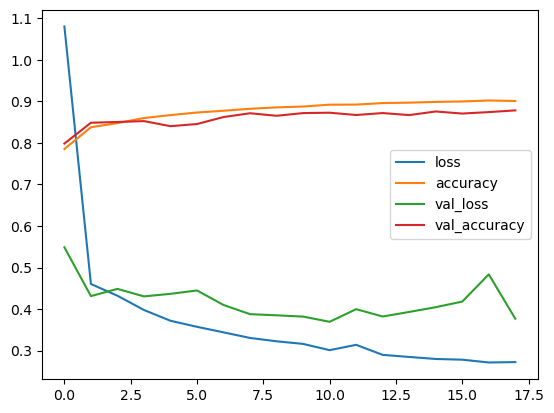

In [34]:
pd.DataFrame(non_norm_history.history).plot()

#### Pre-processing

In [37]:
train_data_norm = train_data/train_data.max()
test_data_norm = test_data/train_data.max()

In [43]:
# train the same model
model_two = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])
model_two.compile(loss="sparse_categorical_crossentropy",optimizer='adam',metrics=['accuracy'])
norm_history = model_two.fit(train_data_norm,train_labels,epochs=18,validation_data=(test_data_norm, test_labels))

Epoch 1/18
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4925 - accuracy: 0.8229 - val_loss: 0.3907 - val_accuracy: 0.8587
Epoch 2/18
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3715 - accuracy: 0.8637 - val_loss: 0.3765 - val_accuracy: 0.8638
Epoch 3/18
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3323 - accuracy: 0.8783 - val_loss: 0.3736 - val_accuracy: 0.8647
Epoch 4/18
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3097 - accuracy: 0.8856 - val_loss: 0.3664 - val_accuracy: 0.8713
Epoch 5/18
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2928 - accuracy: 0.8917 - val_loss: 0.3545 - val_accuracy: 0.8798
Epoch 6/18
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2774 - accuracy: 0.8967 - val_loss: 0.3459 - val_accuracy: 0.8765
Epoch 7/18
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2625 - accuracy: 0.9023 - val_loss: 0.3455 - val_accuracy:

In [45]:
pd.DataFrame(norm_history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.492544,0.822883,0.390742,0.8587
1,0.371466,0.863700,0.376474,0.8638
2,0.332292,0.878250,0.373595,0.8647
3,0.309692,0.885550,0.366398,0.8713
4,0.292758,0.891733,0.354545,0.8798
5,0.277388,0.896717,0.345930,0.8765
6,0.262475,0.902300,0.345545,0.8796
7,0.254855,0.904850,0.332951,0.8851
8,0.241418,0.908867,0.340815,0.8853
9,0.236091,0.910733,0.351553,0.8822


<Axes: >

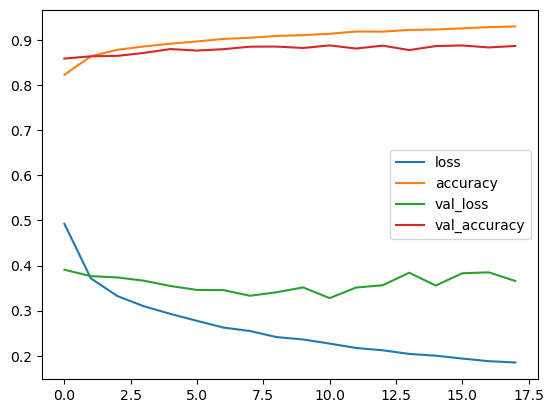

In [46]:
pd.DataFrame(norm_history.history).plot()